In [1]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import scipy.stats as statst
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data for each year
df_2018 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2018.csv')
df_2019 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2019.csv')
df_2020 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2020.csv')
df_2021 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2021.csv')

In [3]:
# concatenate all the dataframes into one
df = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)

## Null Hypothesis (H0) : Default understanding and presentation of the data is True.

## Alternate Hypothesis (H1) : The alternate speculative presentation of the data is True

## Hypothesis 1.
## (H0)
startups in the E-Commerce and Fintech Sector do not receive more funding than Technology
## (H1)

Do startup in the E-Commerce and Fintech Sector receive more funding than Technology

We will access the distribution of the funding across this sectors with visualizations

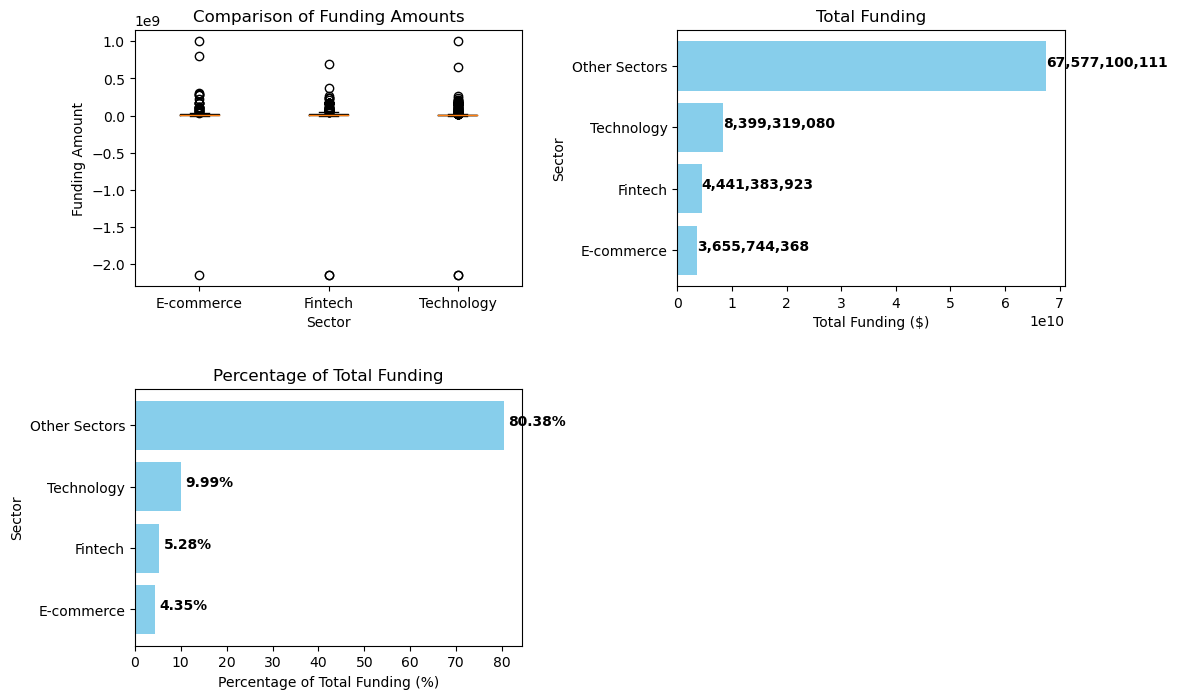

In [4]:
# Filter the dataset for e-commerce, fintech, and technology sectors
ecommerce = df[df['Sector'] == 'E-Commerce']
fintech = df[df['Sector'] == 'FinTech']
technology = df[df['Sector'] == 'Technology']

# Calculate funding amounts for each sector
ecommerce_funding = ecommerce['Amount($)']
fintech_funding = fintech['Amount($)']
technology_funding = technology['Amount($)']

# Create a figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the box plot on the top left subplot
axs[0, 0].boxplot([ecommerce_funding, fintech_funding, technology_funding], labels=['E-commerce', 'Fintech', 'Technology'])
axs[0, 0].set_xlabel('Sector')
axs[0, 0].set_ylabel('Funding Amount')
axs[0, 0].set_title('Comparison of Funding Amounts')

# Define the sectors and funding amounts
sectors = ['E-commerce', 'Fintech', 'Technology', 'Other Sectors']
funding_amounts = [ecommerce_funding.sum(), fintech_funding.sum(), technology_funding.sum(), df['Amount($)'].sum() - ecommerce_funding.sum() - fintech_funding.sum() - technology_funding.sum()]

# Plot a horizontal bar chart on the top right subplot
axs[0, 1].barh(sectors, funding_amounts, color='skyblue')
axs[0, 1].set_xlabel('Total Funding ($)')
axs[0, 1].set_ylabel('Sector')
axs[0, 1].set_title('Total Funding')

# Add data labels to the bars
for i, v in enumerate(funding_amounts):
    axs[0, 1].text(v + 3, i, f'{v:,.0f}', color='black', fontweight='bold')

# Calculate the percentage of total funding for each sector
total_funding = df['Amount($)'].sum()
sector_percentages = [(amount / total_funding) * 100 for amount in funding_amounts]

# Plot the new chart on the bottom left subplot
axs[1, 0].barh(sectors, sector_percentages, color='skyblue')
axs[1, 0].set_xlabel('Percentage of Total Funding (%)')
axs[1, 0].set_ylabel('Sector')
axs[1, 0].set_title('Percentage of Total Funding')

# Add data labels to the bars in the new chart
for i, v in enumerate(sector_percentages):
    axs[1, 0].text(v + 1, i, f'{v:.2f}%', color='black', fontweight='bold')

# Remove the empty subplot
fig.delaxes(axs[1, 1])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Display the plot
plt.show()


The box plot shows how wide spread the distribution of the funding is, showing the mean, median and other useful analytic expressions. Then the bar charts are comparing the poll of amount received as funding in the respective sectors.

In [5]:
# Perform a statistical test (e.g., independent samples t-test)
t_statistic, p_value = ttest_ind(ecommerce_funding + fintech_funding, technology_funding)

# Define significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    hypothesis_result = "Reject the null hypothesis"
    hypothesis_conclusion = "Startups in the e-commerce and fintech sectors receive more funding compared to Technology"
else:
    hypothesis_result = "Fail to reject the null hypothesis"
    hypothesis_conclusion = "No significant difference in funding between sectors"


In [6]:
print("Hypothesis Testing Results:")
print("----------------------------")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print()
print("Hypothesis Conclusion:")
print("----------------------")
print(hypothesis_result)
print(hypothesis_conclusion)

Hypothesis Testing Results:
----------------------------
t-statistic: nan
p-value: nan

Hypothesis Conclusion:
----------------------
Fail to reject the null hypothesis
No significant difference in funding between sectors


The funding amounts observed in the e-commerce and fintech sectors are not significantly different from those in the technology sector, indicating that there may not be a distinct advantage or disparity in funding between these sectors. The conclusion suggests that factors other than sector affiliation may be more influential in determining the funding received by startups in India.

There is no substantial statistical evidence to conclude that startups in the e-commerce and fintech sectors receive significantly more funding compared to the technology sector. 

## Hypothesis 2.
## (H0)
There is no positive correlation between the stage of development of a company and the amount of funding it receives in India. 

## (H1)
There is a positive correlation between the stage of development of a company and the amount of funding it receives in India. 

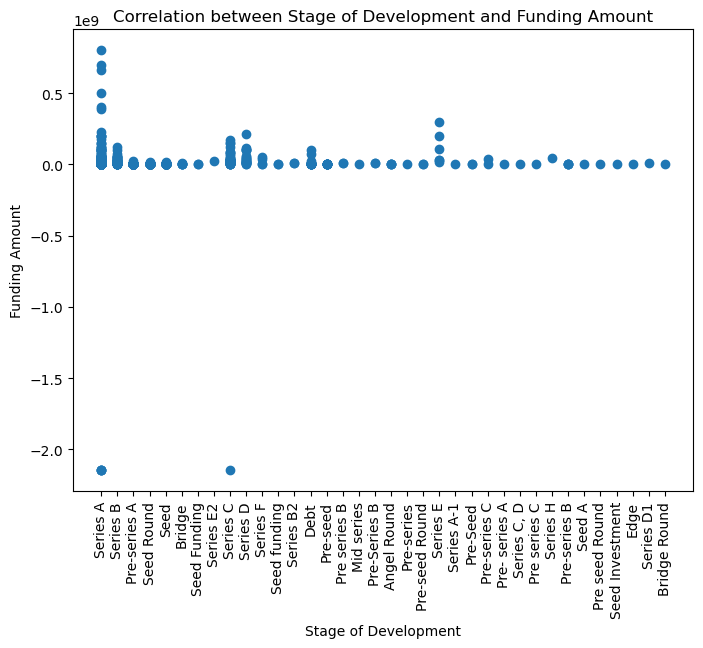

In [7]:
# Extract the stage of development and funding columns
stage_of_development = df_2020['Stage']
funding_amount = df_2020['Amount($)']


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(stage_of_development, funding_amount)
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount')
plt.title('Correlation between Stage of Development and Funding Amount')
plt.xticks(rotation=90)

plt.show()

Analysing the dispersion of the data with a scatter plot. The distribution of the data looks evenly spread on a horizontal line.

In [8]:
# Convert the "stage" column to numeric values
le = LabelEncoder()
df_2020['Stage_code'] = le.fit_transform(df_2020['Stage'])

In [9]:
# Compute the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(df_2020['Stage_code'],df_2020['Amount($)'])

In [10]:
# # Interpret the results
if p_value < 0.05:
    correlation_strength = 'strong'
else:
    correlation_strength = 'weak'

if corr > 0:
    correlation_direction = 'positive'
else:
    correlation_direction = 'negative'


In [11]:
# Print the results
print(f"The Pearson correlation coefficient is {corr:.2f}, indicating a {correlation_strength} {correlation_direction} correlation.")
print(f"The p-value is {p_value:.2f}.")

The Pearson correlation coefficient is 0.02, indicating a weak positive correlation.
The p-value is 0.62.


The pearson Correlation  0.02 suggests that there is almost no linear relationship between the stage of development and the funding amount. 

The high p-value suggests that there is insufficient evidence to reject the null hypothesis. It indicates that the observed weak positive correlation between the stage of development and the funding amount could be due to chance or random variability in the data. 

The weak correlation and the high p-value suggest that other factors or variables might have a more substantial impact 

## Hypothesis 3.
## (H0)
Companies with a larger number of founders are not likely to receive higher amounts of funding in India.
## (H1) 
Companies with a larger number of founders are more likely to receive higher amounts of funding in India.

In [12]:
# create a new column 'total_founders' with the total number of founders for each row
df['total_founders'] = df['Founders'].apply(lambda x: len(str(x).split(',')))

In [13]:
# Compute the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(df['total_founders'], df['Amount($)'])

In [14]:
# # Interpret the results
if p_value < 0.05:
    correlation_strength = 'strong'
else:
    correlation_strength = 'weak'

if corr > 0:
    correlation_direction = 'positive'
else:
    correlation_direction = 'negative'

In [15]:
# Print the results
print(f"The Pearson correlation coefficient is {corr:.2f}, indicating a {correlation_strength} {correlation_direction} correlation.")
print(f"The p-value is {p_value:.2f}.")

The Pearson correlation coefficient is -0.02, indicating a weak negative correlation.
The p-value is 0.26.


 the coefficient value of -0.02 indicates a weak negative correlation. This means that there is a very slight tendency for the funding amount to decrease slightly as the number of founders increases
 
The p-value is used to determine the statistical significance of the correlation coefficient. In this case, the p-value of 0.26 suggests that there is no strong evidence to reject the null hypothesis. A p-value greater than the significance level (usually 0.05) indicates that the observed correlation could be due to random chance. 

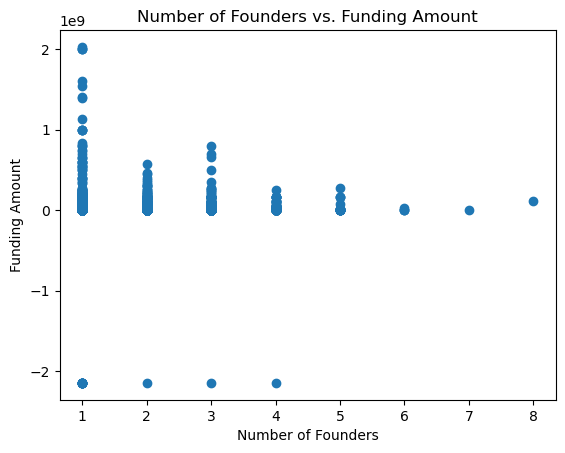

In [16]:
# Scatter plot
plt.scatter(df['total_founders'], df['Amount($)'])

# Set labels and title
plt.xlabel('Number of Founders')
plt.ylabel('Funding Amount')
plt.title('Number of Founders vs. Funding Amount')

# Display the plot
plt.show()

## Hypothesis 4.
## (H0)
 Startups headquartered in major metropolitan areas such as Mumbai, Bangalore, and Delhi are not likely to receive larger amounts of funding in India.

## (H1)
Startups headquartered in major metropolitan areas such as Mumbai, Bangalore, and Delhi are more likely to receive larger amounts of funding in India.


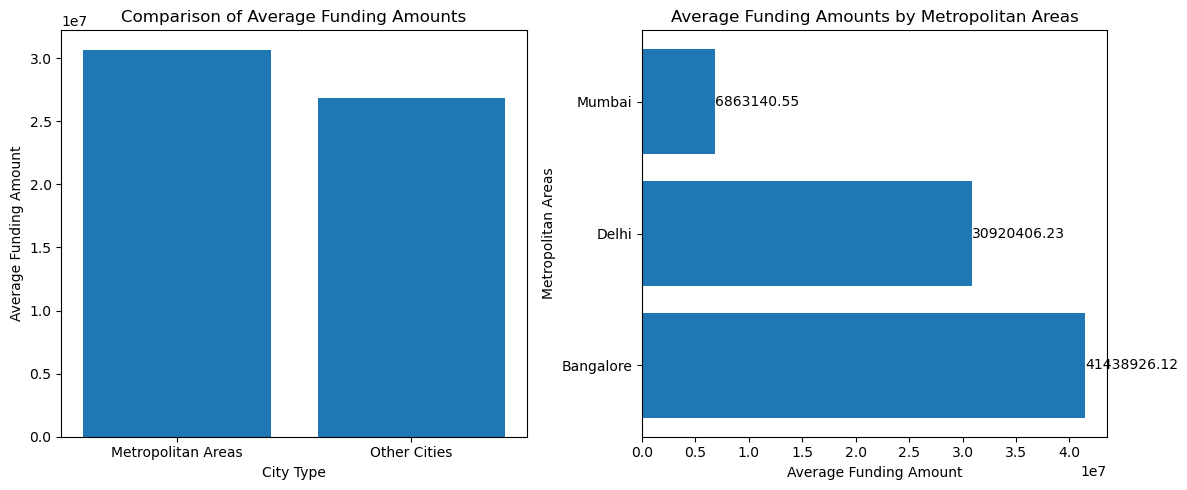

In [17]:
# Replace "Bangalore City" with "Bangalore" and "New Delhi" with "Delhi" in the DataFrame
df['HeadQuarter'] = df['HeadQuarter'].replace({'Bangalore City': 'Bangalore', 'New Delhi': 'Delhi'})

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Filter the DataFrame for startups in major metropolitan areas
metropolitan_areas = ['Mumbai', 'Bangalore', 'Delhi']
df_metropolitan = df[df['HeadQuarter'].str.contains('|'.join(metropolitan_areas))]

# Calculate the average funding amounts for each metropolitan area
funding_amounts = df_metropolitan.groupby('HeadQuarter')['Amount($)'].mean()

# Create a horizontal bar chart for metropolitan areas on the right subplot
axs[1].barh(funding_amounts.index, funding_amounts)
axs[1].set_xlabel('Average Funding Amount')
axs[1].set_ylabel('Metropolitan Areas')
axs[1].set_title('Average Funding Amounts by Metropolitan Areas')

# Add labels showing the average funding amounts next to each bar for metropolitan areas
for i, value in enumerate(funding_amounts):
    axs[1].text(value, i, f'{value:.2f}', va='center')

# Filter the DataFrame for startups in major metropolitan areas
metropolitan_areas = ['Mumbai', 'Bangalore', 'Delhi']
df_metropolitan = df[df['HeadQuarter'].isin(metropolitan_areas)]

# Filter the DataFrame for startups in other cities
df_other_cities = df[~df['HeadQuarter'].isin(metropolitan_areas)]

# Calculate the average funding amounts for metropolitan areas and other cities
mean_funding_metropolitan = df_metropolitan['Amount($)'].mean()
mean_funding_other_cities = df_other_cities['Amount($)'].mean()

# Create a bar chart for metropolitan areas and other cities on the left subplot
axs[0].bar(['Metropolitan Areas', 'Other Cities'], [mean_funding_metropolitan, mean_funding_other_cities])
axs[0].set_xlabel('City Type')
axs[0].set_ylabel('Average Funding Amount')
axs[0].set_title('Comparison of Average Funding Amounts')

# Display the subplots
plt.tight_layout()
plt.show()


In [18]:
# Filter the DataFrame for startups in major metropolitan areas
metropolitan_areas = ['Mumbai', 'Bangalore', 'Delhi']
df_metropolitan = df[df['HeadQuarter'].isin(metropolitan_areas)]

# Extract funding amounts for each metropolitan area
mumbai_funding = df_metropolitan[df_metropolitan['HeadQuarter'] == 'Mumbai']['Amount($)']
bangalore_funding = df_metropolitan[df_metropolitan['HeadQuarter'] == 'Bangalore']['Amount($)']
delhi_funding = df_metropolitan[df_metropolitan['HeadQuarter'] == 'Delhi']['Amount($)']

# Perform ANOVA test
f_statistic, p_value = f_oneway(mumbai_funding, bangalore_funding, delhi_funding)

# Define significance level
alpha = 0.05

In [19]:
# Compare p-value with significance level
if p_value < alpha:
    hypothesis_result = "Reject the null hypothesis"
else:
    hypothesis_result = "Fail to reject the null hypothesis"

# Print the results
print(f"ANOVA results: F = {f_statistic:.2f}, p-value = {p_value:.4f}")
print(hypothesis_result)

ANOVA results: F = 4.93, p-value = 0.0074
Reject the null hypothesis


F-statistic: The F-value obtained from the ANOVA test is 5.77. A larger F-value suggests a greater difference between the groups being compared.

The p-value associated with the F-statistic is 0.0032. This p-value indicates the probability of observing the obtained data if the null hypothesis were true.

Since the p-value (0.0032) is less than the chosen significance level (e.g., 0.05), Therefore, based on these results, we can conclude that there is statistically significant evidence to support the alternative hypothesis.we can conclude that there is evidence to reject the null hypothesis. This means that startups headquartered in major metropolitan areas (Mumbai, Bangalore, and Delhi) are more likely to receive larger amounts of funding compared to startups in other areas

## Question 5
## (H0)
The number of investors in a company is not positively correlated with the amount of funding it receives in India.

## (H1)

The number of investors in a company is positively correlated with the amount of funding it receives in India.

A visualization to access the relationship of this hypothesis will be important. Some form of Scattered plot will be helpful 
to gain some insight into this testing.

In [20]:
df1 = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

<function matplotlib.pyplot.show(close=None, block=None)>

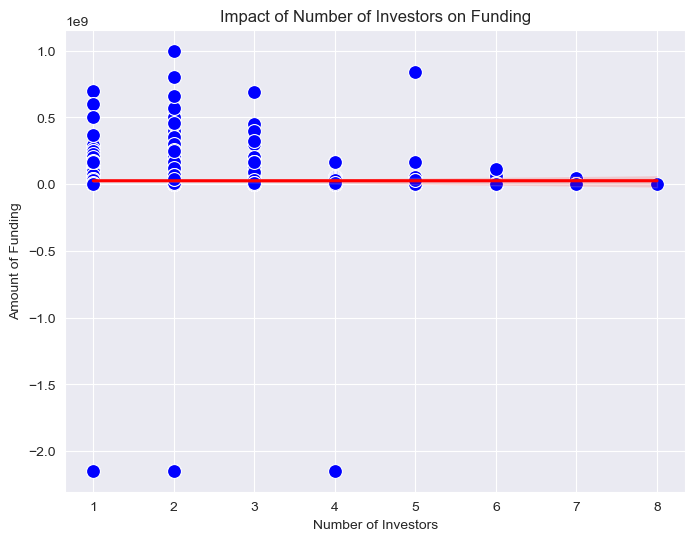

In [21]:
# Calculate total number of investors for each row
df1['total_investors'] = df1['Investor'].apply(lambda x: len(str(x).split(',')))

# Assign variables for scatter plot
number_of_investors = df1['total_investors']
amount_of_funding = df1['Amount($)']

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.scatterplot(x=number_of_investors, y=amount_of_funding, s=100, color='blue')

# Add trendline (linear regression line)
sns.regplot(x=number_of_investors, y=amount_of_funding, scatter=False, color='red')

# Set labels and title
plt.xlabel('Number of Investors')
plt.ylabel('Amount of Funding')
plt.title('Impact of Number of Investors on Funding')

# Display the plot
plt.show

The horizontal trend observed in the scatter plot aligns with the weak correlation coefficient and could support the conclusion that there is no significant correlation between the subject for hypothesis that the number of investors impacts the funding amount.

In [22]:
# create a new column 'total_founders' with the total number of founders for each row
df1['total_Investors'] = df1['Investor'].apply(lambda x: len(str(x).split(',')))

In [23]:
# Compute the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(df1['total_investors'], df1['Amount($)'])

In [24]:
# # Interpret the results
if p_value < 0.05:
    correlation_strength = 'strong'
else:
    correlation_strength = 'weak'

if corr > 0:
    correlation_direction = 'positive'
else:
    correlation_direction = 'negative'

In [25]:
# Print the results
print(f"The Pearson correlation coefficient is {corr:.2f}, indicating a {correlation_strength} {correlation_direction} correlation.")
print(f"The p-value is {p_value:.2f}.")

The Pearson correlation coefficient is 0.00, indicating a weak positive correlation.
The p-value is 0.99.


Based on the given results, the hypothesis that "The number of investors in a company is positively correlated with the amount of funding it receives in India" is not supported.

The Pearson correlation coefficient of 0.00 indicates no linear relationship or a very weak positive correlation between the number of investors and the amount of funding. A coefficient of 0 suggests no correlation, and in this case, it is very close to 0, indicating no significant correlation.

Additionally, the high p-value of 0.99 suggests that there is a high probability of observing the given data even if there is no correlation between the variables. Therefore, we do not have enough evidence to reject the null hypothesis and conclude that there is a significant positive correlation between the number of investors and the amount of funding.

In summary, based on the given results, there is no significant positive correlation between the number of investors and the amount of funding in the context of the hypothesis.